In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy
from cordova_plugins import d_plugins


# Import Dataset

In [2]:
df_api = pd.read_csv("../db/cdv/cordova_APIs.csv")
df_permission = pd.read_csv("../db/cdv/cordova_PERMISSIONs.csv")
# df_feature = pd.read_csv("../db/fcordova/eatures.csv")


In [3]:
df_api.columns

Index(['apk_name', 'navigator.getBattery', 'navigator.camera', 'device',
       'navigator.notification', 'cordova.file', 'navigator.geolocation',
       'cordova.InAppBrowser', 'Media', 'navigator.device.capture',
       'navigator.connection', 'screen.orientation', 'navigator.splashscreen',
       'StatusBar', 'navigator.vibrate'],
      dtype='object')

In [4]:
l_api = list(df_api.columns)
l_permission = df_permission.columns

In [5]:
l_api

['apk_name',
 'navigator.getBattery',
 'navigator.camera',
 'device',
 'navigator.notification',
 'cordova.file',
 'navigator.geolocation',
 'cordova.InAppBrowser',
 'Media',
 'navigator.device.capture',
 'navigator.connection',
 'screen.orientation',
 'navigator.splashscreen',
 'StatusBar',
 'navigator.vibrate']

In [6]:
"successCallback" in l_api

False

In [7]:
df_api

,apk_name,navigator.getBattery,navigator.camera,device,navigator.notification,cordova.file,navigator.geolocation,cordova.InAppBrowser,Media,navigator.device.capture,navigator.connection,screen.orientation,navigator.splashscreen,StatusBar,navigator.vibrate
0,com.pr.ojectblue.dothis,13,6,7,2,5,8,0,1,2,5,16,0,0,0
1,com.indiageeks.apk,13,1,1,13,1,1,0,94,1,5,15,1,0,0
2,com.koimoi.android,13,1,4,2,8,1,0,94,1,11,2,1,0,0
3,com.activitylabs.bankbluffer,13,0,8,1,7,4,0,98,0,1,0,0,0,0
4,prayerguide.thegagne.com,0,4,7,3,5,8,0,1,2,5,16,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,sportstables.com,13,1,1,2,8,1,0,94,1,11,13,1,0,0
658,com.phonegap.tip,0,2,1,2,5,1,0,12,2,0,5,0,0,0
659,com.ugliapps.iheartfruits,12,0,3,0,6,0,0,74,0,1,0,0,0,0
660,sunnyappz.thesecretquotes,13,0,8,0,8,0,0,98,0,5,2,0,0,0


# Analyse API calls

## the occurance of funcitons detected for each plugin in each APK

In [8]:
df_plugins_only = df_api.drop(columns=["apk_name"])
df_plugins_only

,navigator.getBattery,navigator.camera,device,navigator.notification,cordova.file,navigator.geolocation,cordova.InAppBrowser,Media,navigator.device.capture,navigator.connection,screen.orientation,navigator.splashscreen,StatusBar,navigator.vibrate
0,13,6,7,2,5,8,0,1,2,5,16,0,0,0
1,13,1,1,13,1,1,0,94,1,5,15,1,0,0
2,13,1,4,2,8,1,0,94,1,11,2,1,0,0
3,13,0,8,1,7,4,0,98,0,1,0,0,0,0
4,0,4,7,3,5,8,0,1,2,5,16,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,13,1,1,2,8,1,0,94,1,11,13,1,0,0
658,0,2,1,2,5,1,0,12,2,0,5,0,0,0
659,12,0,3,0,6,0,0,74,0,1,0,0,0,0
660,13,0,8,0,8,0,0,98,0,5,2,0,0,0


## Heatpmap

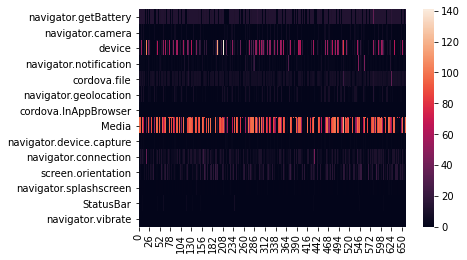

In [9]:
import seaborn as sns
df_plugins_only_T = df_plugins_only.T    # transpose
ax = sns.heatmap(df_plugins_only_T)

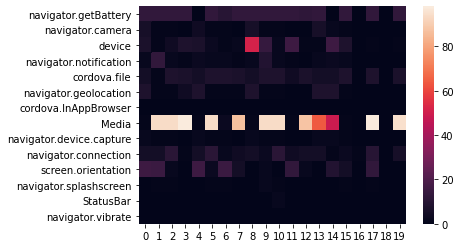

In [10]:
# select a set of apks, originial
set_num = 20
ax = sns.heatmap(df_plugins_only_T.iloc[:, :set_num])


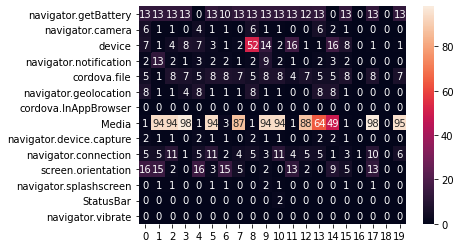

In [11]:
# select a set of apks, heatmap with annotation
set_num = 20
ax = sns.heatmap(df_plugins_only_T.iloc[:, :set_num], annot=True)

## heatmap without media and device

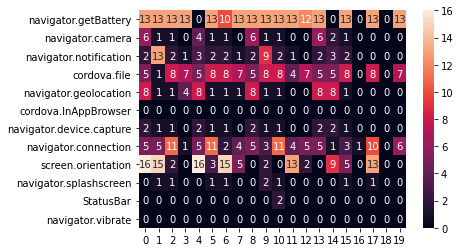

In [12]:

df_plugins_media = df_api.drop(columns=["apk_name", "Media", "device"])
df_plugins_media_T = df_plugins_media.T
# select a set of apks, heatmap with annotation
set_num = 20
ax = sns.heatmap(df_plugins_media_T.iloc[:, :set_num], annot=True)